<a href="https://colab.research.google.com/github/NicolyAvelino/algebraLinear/blob/main/Aula3_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx

def create_random_adj(size_n):
    A = np.random.choice([0,1,2], size=(size_n,size_n), replace=True, p=None)
    for i in np.arange(0, size_n):
        A[i,i] = 0
    return A

#pip install networkx
def show_grafo(A):
    n = A.shape[0]
    G = nx.MultiDiGraph()
    for i in np.arange(0, n):
        for j in np.arange(0, n):
            if A[i,j]>0:
                for k in np.arange(0, A[i,j]):
                    G.add_edge(i, j)
    nx.draw(G, with_labels=True)
    

# Aula 3 - Grafos e Rank de páginas

## Identificação:

 - Nome 1 : Carolina Nascimento Silva

 - Nome 2 : Nicoly de Oliveira Avelino


In [ ]:
import numpy as np

## Multiplicação de Matrizes

Dados duas matrizes $A = (a_{i,j})$ de dimensão $n\times p$ e $B = (b_{i,j})$ de dimensão $p\times m$, o produto de $A$ por $B$ é a matriz $C = (c_{i,j})$ de dimensão $n\times m$ tal que
$$c_{i,j} = \sum_{k=1}^p a_{i,k}b_{k, j}$$

# EXEMPLO DE SOMA:

In [32]:
import numpy as np

A = np.array([
    [1, 0],
    [1, 1]
])

B = np.array([
    [0, 1],
    [1, 2]
])

def Soma(A,B):
  C = np.empty(shape= A.shape)
  i=0
  while(i<A.shape[0]):
    j = 0
    while(j<A.shape[0]):
      C[i,j] = A[i,j] + B [i,j]
      j = j+1
    i = i +1
  return C   


Soma(A,B)

array([[1., 1.],
       [2., 3.]])

## Exercício 1 :

- Escreva uma função que recebe duas matrizes $A$ e $B$ e realiza o produto $A\times B$

In [31]:
import numpy as np

A = np.array([
    [1, 0],
    [1, 1]
])

B = np.array([
    [0, 1],
    [1, 2]
])

def multiplicacao(A,B):
    n= A.shape[0] #linhas A
    p = A.shape[1] #colunas A
    m = B.shape[1] #linhas B
    C= np.zeros(shape=(n,m))

    i = 0;
    while(i<n):
      j=0;
      while(j<m):
        k = 0
        while(k<p):
          C[i,j] = C[i,j] + A[i,k] * B[k,j]
          k = k + 1
        j = j + 1
      i = i + 1
    return C

multiplicacao(A,B)    
  

array([[0., 1.],
       [1., 3.]])

# Grafos

<center>
<img src="fig/graph1.png" width="400" height="500">
</center>

## Matriz de Adjacência

A matriz de adjacência de um grafo representa a quantidade de caminhos de tamanho 1 do vértice i para o vértice j.
Exemplo:

Do vértice 1 para o vértice 5 existe apenas um caminho de comprimento 1, assim $a_{1,5} = 1$

Do vértice 0 para o vértice 2, existem dois caminhos de comprimento 1, assim $a_{0,2} = 2$.

Temos assim para o gráfo acima:

In [ ]:
A = np.array([
    [0, 0, 2, 0, 1, 0],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 2, 1, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0]    
])


In [ ]:
A

array([[0, 0, 2, 0, 1, 0],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 2, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0]])

## Exercício 2 :
 - Escreva um método que recebe 
     - Matriz de adjacência $A$ de um grafo,
     - dois vértices $i$ e $j$, e 
     - um inteiro $n$
     
 - Retorna o número de caminhos de comprimento $n$ de $i$ até $j$.

In [41]:
import numpy as np

B = np.array([
    [0, 1],
    [1, 2]
])

def multiplicacao(A,B):
    n= A.shape[0] #linhas A
    p = A.shape[1] #colunas A
    m = B.shape[1] #linhas B
    C= np.zeros(shape=(n,m))

    i = 0;
    while(i<n):
      j=0;
      while(j<m):
        k = 0
        while(k<p):
          C[i,j] = C[i,j] + A[i,k] * B[k,j]
          k = k + 1
        j = j + 1
      i = i + 1
    return C  

def numero_caminhos(B, i, j, n):
  C = B
  k=1
  while(k<n):
    C = multiplicacao(B,C)  
    k = k+1
  return C[i,j]

numero_caminhos(B, 0, 0, 2)


1.0

# Grafos - Projeto
- Criar um modelo simples de rank de páginas

Considere um grafo representando um conjunto de páginas da web (1000 páginas) e suas respectivas conexões.
Vamos representar esse gráfico pela matriz de adjacencia:
    

In [ ]:
# Exemplo com 10 páginas
A = create_random_adj(10)

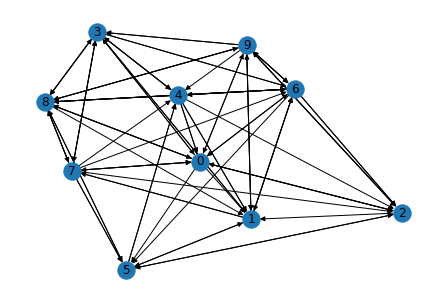

In [ ]:
show_grafo(A)

# Instruções

- Objetivo: Criar um classificador simples de páginas
        - Crie um método que recebe uma matriz de adjacencia (representando páginas e links entre elas)
        - Recebe um parâmetro n
        - Recebe um parâmetro m
        - Retorna os top m páginas que possuem mais referências (maior número de caminhos de tamanho 1, 2, 3....n que chegam até eles).
- Observações: Usar o menor número possível de recursos da linguagem. Exemplo: Produto de matrizes - usar a função contruída acima (o numpy nativamente possui multiplicaçao de matrizes, ordenação entre outras funções built-in - Mas a idéia é trabalhar com os recursos que aprendemos até o momento.)
                

In [ ]:
# Matriz de exemplo para a implementação.

A = create_random_adj(1000)

In [43]:
import numpy as np

A = np.array([
    [0, 1],
    [1, 2]
])


def multiplicacao(A,B):
    n= A.shape[0] #linhas A
    p = A.shape[1] #colunas A
    m = B.shape[1] #linhas B
    C= np.zeros(shape=(n,m))

    i = 0;
    while(i<n):
      j=0;
      while(j<m):
        k = 0
        while(k<p):
          C[i,j] = C[i,j] + A[i,k] * B[k,j]
          k = k + 1
        j = j + 1
      i = i + 1
    return C 


def Rank_paginas(A, n, m):

  B = A 
  somaCol = B.sum(axis=0)
  i = 1
  while(i<n):
    B = multiplicacao(A,A)
    somaCol = somaCol + B.sum(axis=0)
    i = i+1

  ordemVet = somaCol.argsort()[::-1]

  return ordemVet[:m]

Rank_paginas(A, 2, 2)

[array([1, 3]), array([1, 3])]

Referências:
- https://graphonline.ru/en/
- http://mxwell.github.io/draw-graph/